Associated google slide is here: https://docs.google.com/presentation/d/1otwIXjVF72-117U6mtNXlicBzMR0dZ9zgg_5YZVioqs/edit?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Cafe_Data_MRA (1).xlsx")

# INITIAL ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 11.1+ MB


In [ ]:
df.describe()

,Quantity,Rate,Tax,Discount,Total
count,145830.000000,145830.000000,145830.000000,145830.000000,145830.000000
mean,1.121299,161.782259,48.929061,0.095079,224.959852
std,0.477237,102.244631,40.272851,3.720735,164.960776
min,1.000000,0.010000,0.000000,0.000000,0.010000
25%,1.000000,95.000000,22.560000,0.000000,117.560000
50%,1.000000,125.000000,32.060000,0.000000,167.060000
75%,1.000000,225.000000,72.000000,0.000000,315.000000
max,30.000000,2100.000000,2731.250000,825.000000,14231.250000


In [ ]:
df.shape

(145830, 10)

In [ ]:
df.isnull().sum()

Date            0
Bill Number     0
Item Desc       0
Time            0
Quantity        0
Rate            0
Tax             0
Discount        0
Total           0
Category        0
dtype: int64

# EXPLORATORY DATA ANALYSIS

**The code below performs data aggregation on the cafe's point-of-sale data. It calculates summary statistics for both individual menu items and menu categories. For items, it aggregates the total quantity sold, total revenue, average rate, total tax, and total discount. Similarly, for categories, it computes the sum of quantities, total revenue, average rate, total tax, and total discount. The results are sorted in descending order based on total revenue, providing insights into the most lucrative items and categories.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month
df['Month'] = df['Date'].dt.month_name()

# Aggregations for items
items_aggregated = df.groupby('Item Desc').agg({
    'Quantity': 'sum',
    'Total': 'sum',
    'Rate': 'mean',
    'Tax': 'sum',
    'Discount': 'sum'
}).sort_values(by='Total', ascending=False).head(10)

# Aggregations for categories
categories_aggregated = df.groupby('Category').agg({
    'Quantity': 'sum',
    'Total': 'sum',
    'Rate': 'mean',
    'Tax': 'sum',
    'Discount': 'sum'
}).sort_values(by='Total', ascending=False)

### 1. Plotting the total tax and discount provided across each category type

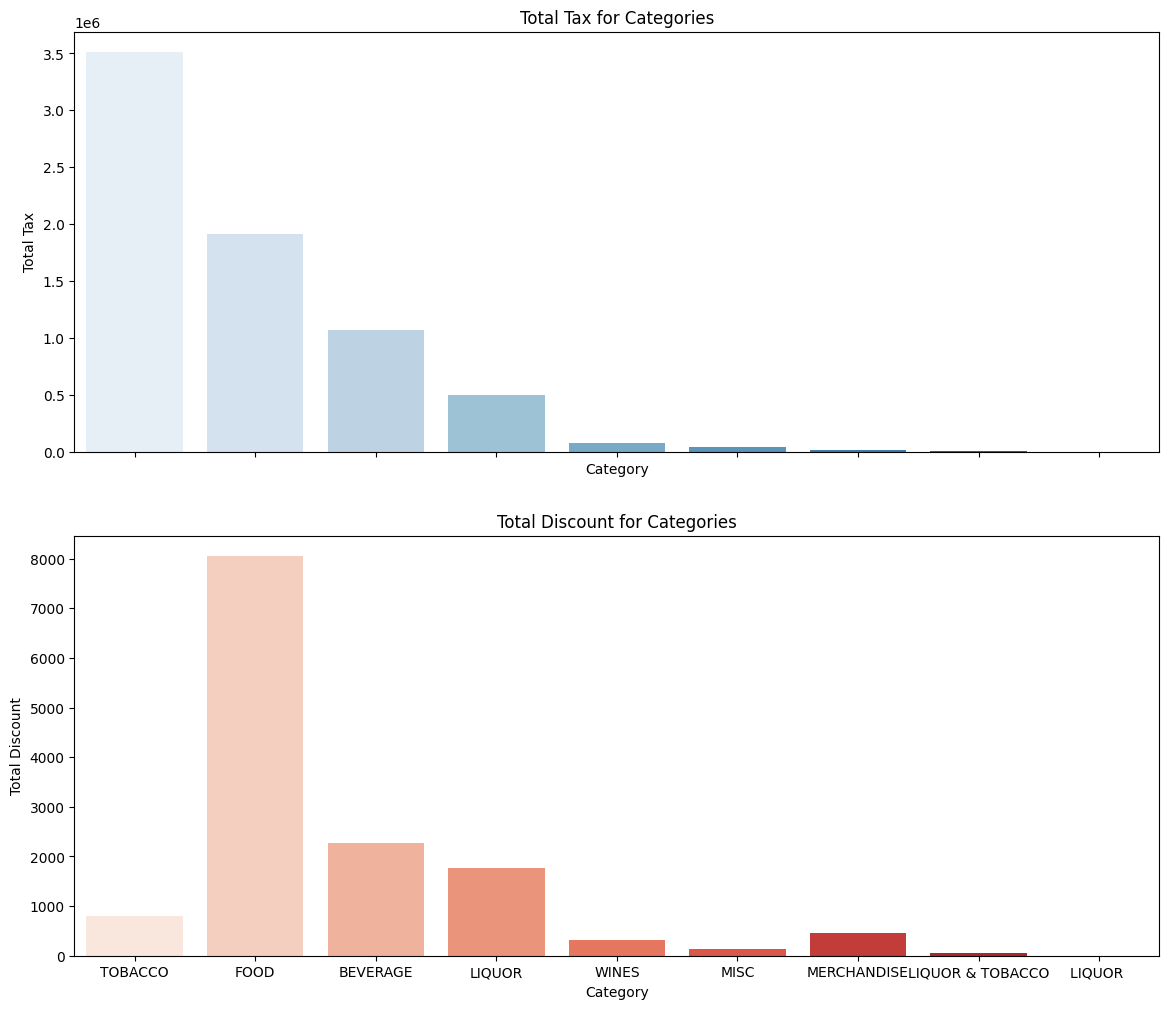

In [ ]:
# Visualize total tax and discount for categories
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)
sns.barplot(x=categories_aggregated.index, y='Tax', data=categories_aggregated, palette='Blues', ax=axes[0])
axes[0].set_title('Total Tax for Categories')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Tax')

sns.barplot(x=categories_aggregated.index, y='Discount', data=categories_aggregated, palette='Reds', ax=axes[1])
axes[1].set_title('Total Discount for Categories')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Discount')

plt.show()

### 2. Plotting top 10 categories sold (by Quantity)

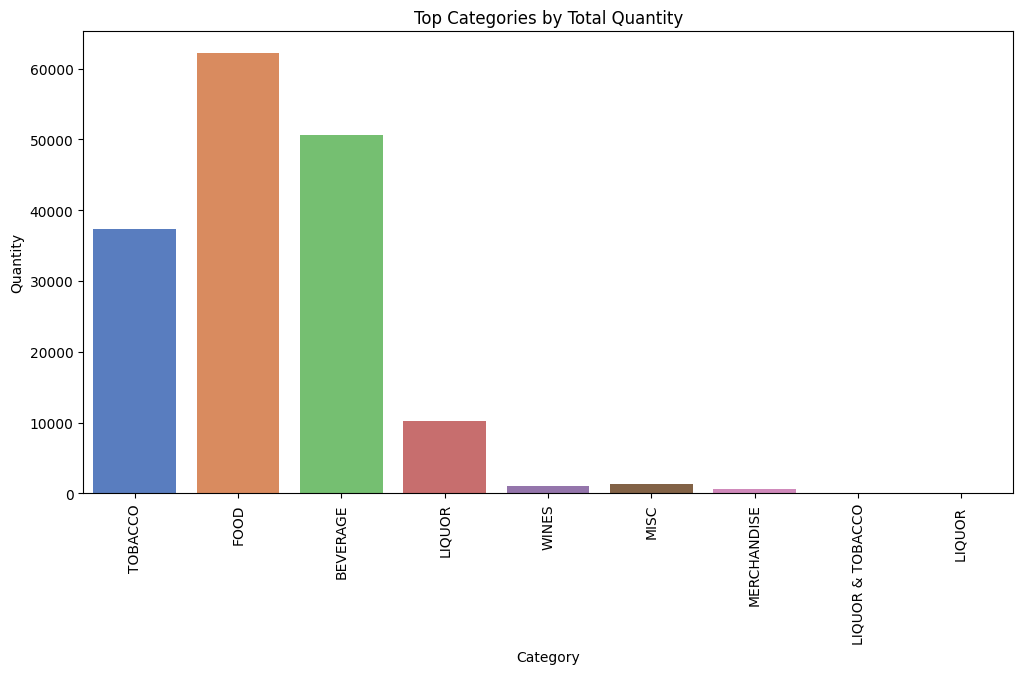

In [ ]:
# Visualize top categories by total sales
plt.figure(figsize=(12, 6))
sns.barplot(x=categories_aggregated.index, y='Quantity', data=categories_aggregated, palette='muted')
plt.title('Top Categories by Total Quantity')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()



### 3. Plotting the top 10 highest number of items sold (by quantity)

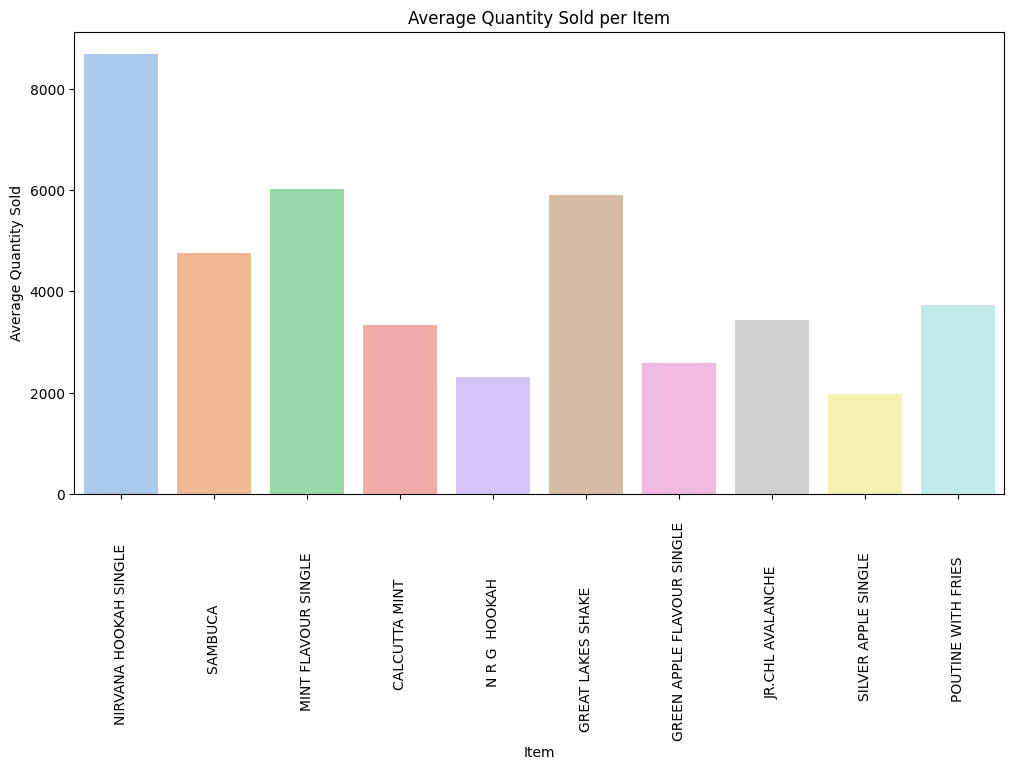

In [ ]:
# Visualize average quantity sold per item
plt.figure(figsize=(12, 6))
sns.barplot(x=items_aggregated.index, y='Quantity', data=items_aggregated, palette='pastel')
plt.title('Total Quantity Sold per Item')
plt.xlabel('Item')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)

plt.show()


### 4. Category distribution in a pie chart

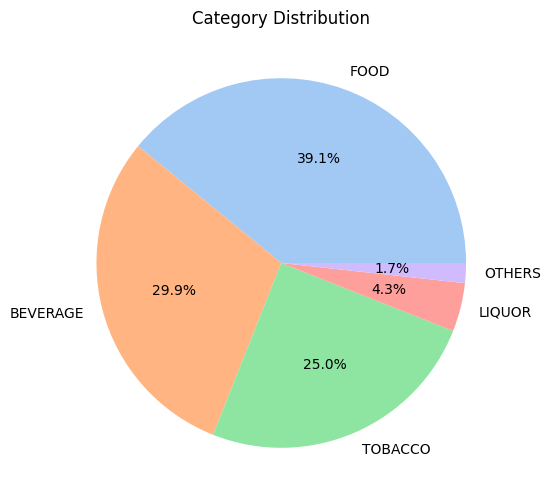

In [ ]:
# Extract month
df['Month'] = df['Date'].dt.month_name()

# Create a new column for modified categories
df['Modified_Category'] = df['Category'].apply(lambda x: x if x in ["BEVERAGE", "FOOD", "TOBACCO", "LIQUOR"] else "OTHERS")

# Pie chart for modified category distribution
category_distribution = df['Modified_Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Category Distribution')
plt.show()


### 5. Total revenue over time (By months)

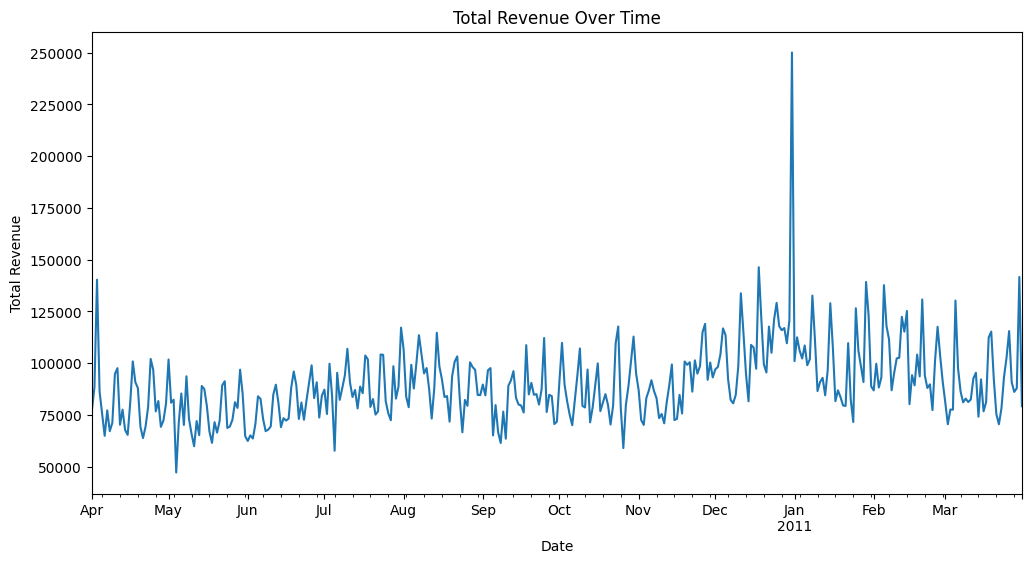

In [ ]:
# Total revenue over time
df['Date'] = pd.to_datetime(df['Date'])
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')  # Convert 'Total' to numeric (handle errors)
df.set_index('Date', inplace=True)

# Plotting total revenue over time
plt.figure(figsize=(12, 6))
df.resample('D')['Total'].sum().plot(title='Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

**Let's create a function to convert the hour number into the appropriate time of the day such as morning, evening, night etc. This will be helpful in later analysis.**

In [ ]:
# Define time categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the categorization
df['time_category'] = df['hour'].apply(categorize_time)


### 6. Number of customers visualized during 4 quarters of the day

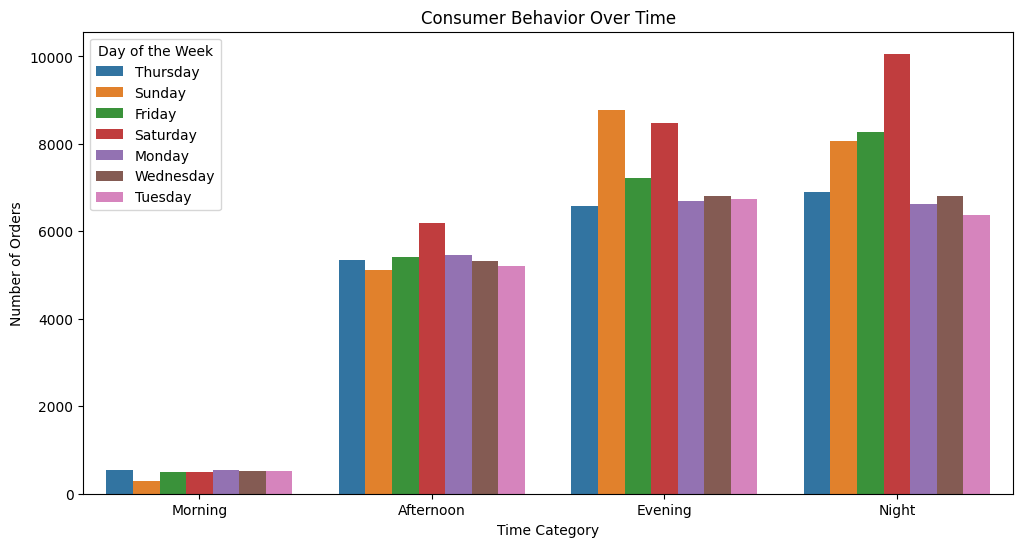

In [ ]:
# Create 'day_of_week' column
df['day_of_week'] = df['Date'].dt.day_name()

# Plotting trends based on time categories
plt.figure(figsize=(12, 6))
sns.countplot(x='time_category', data=df, hue="day_of_week",  order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Consumer Behavior Over Time')
plt.xlabel('Time Category')
plt.ylabel('Number of Orders')
plt.legend(title='Day of the Week')
plt.show()



### 7. 20 Least popular menu items

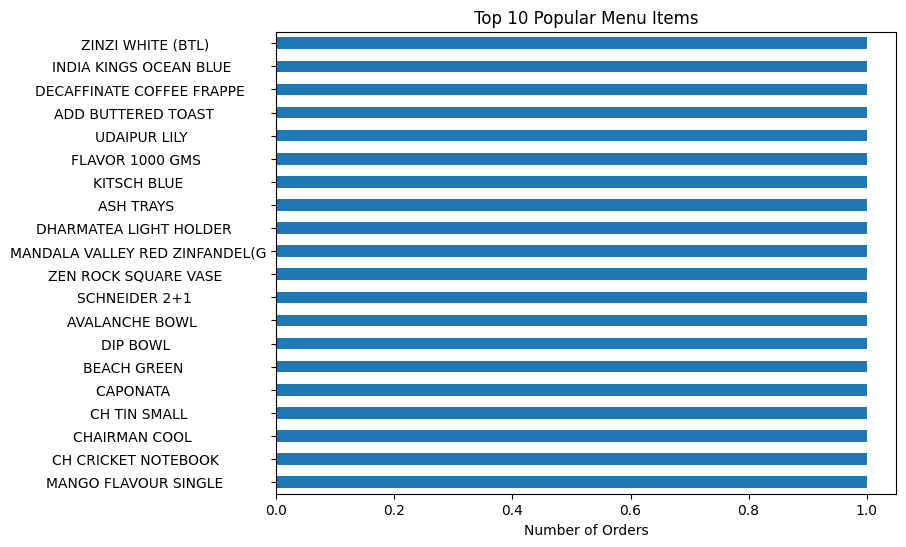

In [ ]:
# Calculate popularity of menu items
menu_popularity = df['Item Desc'].value_counts()

# Plotting popular items
plt.figure(figsize=(8, 6))
menu_popularity[-20:].plot(kind='barh', title='Top 10 Popular Menu Items')
plt.xlabel('Number of Orders')
plt.show()

### 8. Most popular menu items (top 10)

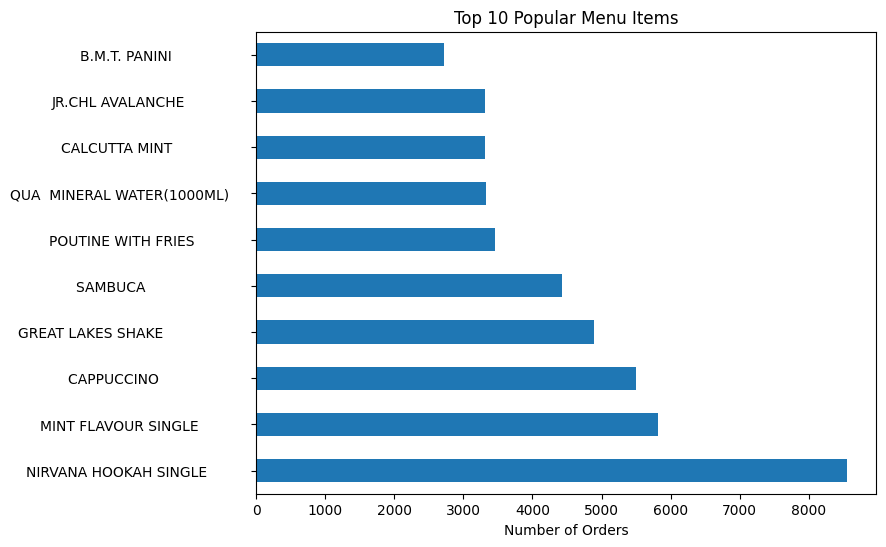

In [ ]:
# Calculate popularity of menu items
menu_popularity = df['Item Desc'].value_counts()

# Plotting popular items
plt.figure(figsize=(8, 6))
menu_popularity[:10].plot(kind='barh', title='Top 10 Popular Menu Items')
plt.xlabel('Number of Orders')
plt.show()

### 9. Total number of order per month

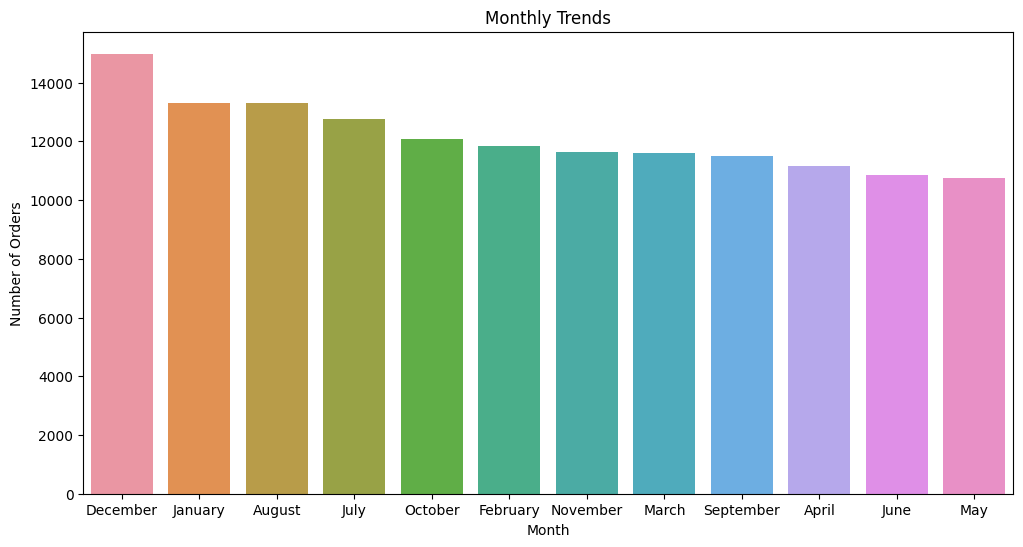

In [ ]:
# Extract month
df['month'] = df.index.month_name()

# Plotting monthly trends
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df, order=df['month'].value_counts().index)
plt.title('Monthly Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

# MARKET BASED ANALYSIS USING ASSOCIATION RULES AND APRIORI ALGORITHM

## INTRODUCTION
Market basket analysis and association rules play a crucial role in understanding patterns and relationships within transactional data, such as customer purchases in a cafe. In the context of this project, market basket analysis involves examining the co-occurrence patterns of items in customer orders. Association rules, derived from this analysis, reveal significant connections between items and offer insights into customer behavior.



## MARKET BASED ANALYSIS
Market basket analysis is a data mining technique that explores relationships between products frequently purchased together. It identifies patterns in consumer behavior by examining transactional data, helping businesses make informed decisions related to product placement, cross-selling, and promotional strategies. In a cafe setting, it can unveil which menu items are commonly ordered together, providing opportunities for bundling or targeted promotions.

## ASSOCIATION RULES
Association rules are the outcomes of market basket analysis, providing actionable insights into item associations. Each rule consists of antecedents (items present in a transaction) and consequents (items likely to be purchased given the antecedents). The rules are quantified by metrics like support, confidence, and lift.


1. Support: This indicates the frequency with which a particular rule occurs in the dataset. It measures the proportion of transactions that contain both the antecedents and consequents.

2. Confidence: It measures the likelihood that the presence of antecedents will result in the presence of consequents. High confidence suggests a strong association between items.

3. Lift: Lift is the ratio of the observed confidence to the expected confidence if the items were independent. It measures how much more likely the consequents are to be purchased when the antecedents are present compared to when they are not.


## IMPORTANCE OF MARKET BASED ANALYSIS AND ASSOCIATION RULES IN THIS PROJECT
In this project, market basket analysis and association rules are essential for understanding customer preferences and optimizing the cafe's offerings. Identifying popular item combinations allows the cafe to create targeted promotions or bundle items for increased sales. For instance, if certain beverages and snacks are commonly purchased together, the cafe could create combo deals or recommend these pairings to customers, enhancing their experience and potentially boosting revenue. Confidence, lift, and support values guide decision-making by quantifying the strength and significance of these associations.






1. The code below performs association rule mining using the Apriori algorithm on transaction data from a cafe's point of sale system.

2. It starts by preprocessing the data to create a binary matrix, where each row represents a unique bill, columns correspond to different item categories, and cell values indicate whether an item from a particular category is present in the corresponding bill.

3. The Apriori algorithm is then applied to identify frequent itemsets—combinations of items that appear together with a specified minimum support threshold.

4. Subsequently, association rules are generated based on these frequent itemsets, considering a specified minimum lift threshold.

5. The resulting rules, comprising antecedents (items present in the transaction), consequents (items likely to be purchased together), support (the frequency of occurrence), confidence (the likelihood of purchasing consequents given antecedents), and lift (the ratio of observed to expected confidence), are displayed for further analysis.


### PACKAGE USED



The Python package used here is mlxtend, which stands for "machine learning extensions." Specifically, the package provides tools and extensions for traditional machine learning and data mining tasks. In this context, the package is employed for market basket analysis using Apriori algorithm and association rule mining.

1. mlxtend.frequent_patterns.apriori: This module implements the Apriori algorithm, a classic algorithm for mining frequent itemsets in a transaction dataset. It identifies patterns of items that often occur together in transactions.

2. mlxtend.frequent_patterns.association_rules: This module is used for generating association rules from frequent itemsets. Association rules reveal relationships between different items in transactions, helping to derive insights into customer behavior and preferences.

mlxtend is a versatile and user-friendly library, commonly used for its simplicity and effectiveness in implementing various machine learning and data mining tasks, especially in the context of association rule mining and frequent pattern analysis.

### IMPLEMENTATION

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Preprocess the data
basket = df.groupby(['Bill Number ', 'Category'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Bill Number ')

# Convert quantities to binary values for presence or absence
basket[basket > 0] = 1

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)

# Display associations
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,(FOOD),(BEVERAGE),0.225401,0.486521,1.108433
1,(BEVERAGE),(FOOD),0.225401,0.513527,1.108433
2,(TOBACCO),(BEVERAGE),0.154797,0.321359,0.732146
3,(BEVERAGE),(TOBACCO),0.154797,0.352671,0.732146
4,(TOBACCO),(FOOD),0.167557,0.347849,0.750823
5,(FOOD),(TOBACCO),0.167557,0.361668,0.750823
6,"(TOBACCO, FOOD)",(BEVERAGE),0.069318,0.413696,0.942516
7,"(TOBACCO, BEVERAGE)",(FOOD),0.069318,0.447798,0.966561
8,"(FOOD, BEVERAGE)",(TOBACCO),0.069318,0.307531,0.638436
9,(TOBACCO),"(FOOD, BEVERAGE)",0.069318,0.143904,0.638436


### MOST POPULAR ITEM COMBINATIONS (based on confidence threshold)

The code below sorts the association rules generated by the Apriori algorithm based on confidence in descending order.

The DataFrame is sorted in descending order of confidence, presenting the most confident associations first.

This enables easy identification of the most popular and reliable item combinations that customers are likely to purchase together, aiding in strategic decision-making for promotional offers or menu optimization.






In [ ]:
# Display associations sorted by confidence (you can choose a different metric)
popular_combos = rules.sort_values(by='confidence', ascending=False)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Display the most popular combos
popular_combos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1,(BEVERAGE),(FOOD),0.225401,0.513527,1.108433
0,(FOOD),(BEVERAGE),0.225401,0.486521,1.108433
7,"(TOBACCO, BEVERAGE)",(FOOD),0.069318,0.447798,0.966561
6,"(TOBACCO, FOOD)",(BEVERAGE),0.069318,0.413696,0.942516
5,(FOOD),(TOBACCO),0.167557,0.361668,0.750823
3,(BEVERAGE),(TOBACCO),0.154797,0.352671,0.732146
4,(TOBACCO),(FOOD),0.167557,0.347849,0.750823
2,(TOBACCO),(BEVERAGE),0.154797,0.321359,0.732146
8,"(FOOD, BEVERAGE)",(TOBACCO),0.069318,0.307531,0.638436
11,(BEVERAGE),"(TOBACCO, FOOD)",0.069318,0.157926,0.942516


## ACTIONABLE INSIGHTS, RESULTS AND EXPLANATIONS ON ABOVE TABLE

### 1. Postive combinations

Based on above dataframe, following are some combinations of food items that can help in increasing sales:

*Row #1 and #2 show that BEVERAGE and FOOD have a strong association in both directions. There is a lift of 1.1, indicating the occurrence of one positively influences the other. A combo deal bundling a beverage and food item could perform well.*

*Row #7 and #6 show an association between TOBACCO, BEVERAGE and FOOD. A triple combo deal with items from these categories may appeal to some customer segments. However, the lower lift values around 0.9 indicate a negative interaction. Bundling all three together may not provide much additional lift compared to just pairs.*

*Row #3, #4, #2 show FOOD and TOBACCO are frequently purchased together. A simple combo with one food and one tobacco item could do well.*

*BEVERAGE and TOBACCO also appear frequently (Rules #5, #2) indicating another pairwise combo option.*

In summary, the top associations to consider for combo deals are:

1. FOOD + BEVERAGE
2. FOOD + TOBACCO
3. BEVERAGE + TOBACCO

A triple combo with FOOD + BEVERAGE + TOBACCO may also work but may not provide added value over the pairwise combos.

### 2. Negative combinations

Rule #9 shows bundling TOBACCO with FOOD + BEVERAGE has low lift of 0.63. This implies TOBACCO does not go as well with the FOOD+BEVERAGE bundle. It may be better to keep the tobacco combo separate.

*Rules #10 and #11 show low confidence and lift values (<0.2 and <1) for bundling {TOBACCO, FOOD} with BEVERAGE and {TOBACCO, BEVERAGE} with FOOD. This suggests these combinations do not occur frequently together.*

Looking at the lower ranked rules we could also avoid bundles like:
1. DAIRY + BAKERY: These might not make an appealing combo to customers.
2. ALCOHOL + BREAKFAST_ITEMS: People may not want these food types together.


Some category level anti-associations to avoid:

1. TOBACCO + DAIRY
2. ALCOHOL + BREAKFAST_ITEMS

### 3. Discount offers or "Buy two get one free" offers



We can also consider promotional offers like discounts or 'buy-one-get-one' based on the association rules. Here are some ideas:

1. The strong association between BEVERAGE and FOOD could be used to offer a discount when buying one of each. For example "Get 20% off when you buy 1 food item + 1 beverage"

2. The FOOD + TOBACCO association could be promoted with a "Buy 2 food items, get 1 tobacco product free" type offer since these are frequently bundled.

3. For the BEVERAGE + TOBACCO pairing, a "Buy 2 beverages, get 1 tobacco 50% off" deal may work well.

4. For triple associations like FOOD + BEVERAGE + TOBACCO, we can offer a steeper discount like 30% off entire basket when 1 item from each category is purchased.